In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m=20
X = 3*np.random.rand(m,1)
y = 1+0.5*X+np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

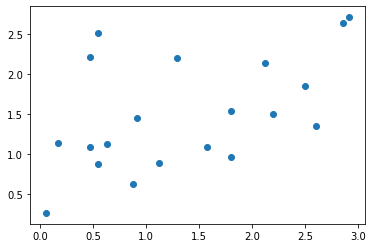

In [30]:
plt.scatter(X,y)

Text(0.5, 1, 'Corelation')

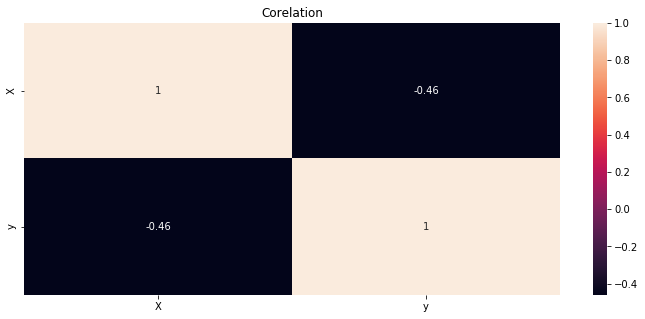

In [31]:
data_array = np.array([X,y]).reshape((20,2))
# data_array.shape
data = pd.DataFrame(data_array,columns=['X','y'])
data_corr =  data.corr()
plt.figure(figsize=(12,5))
sns.heatmap(data_corr,annot=True)
plt.title("Corelation")

In [32]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures()

from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

## Ridge Regression

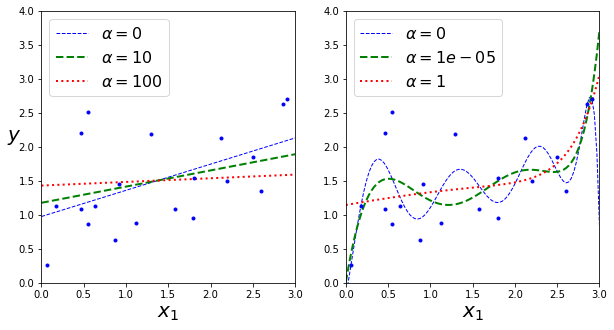

In [33]:
from sklearn.pipeline import Pipeline

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b--","g--","r:")):
        model = model_class(alpha, **model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
                    ('std_scalar',StandardScaler()),
                    ('regularize_reg',model),
                ])
        model.fit(X,y)
        y_new_regularized = model.predict(X_new)
        lw=2 if alpha>0 else 1
        plt.plot(X_new, y_new_regularized, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=16)
    plt.xlabel("$x_1$",fontsize=20)
    plt.axis([0,3,0,4])
    
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=[0,10,100], random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=20)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=[0,10**-5,1], random_state=42)
plt.show()

In [34]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.6]])

array([[1.58699501]])

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.6]])

array([1.5565052])

In [36]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.6]])

array([[1.58700477]])

## Lasso regression

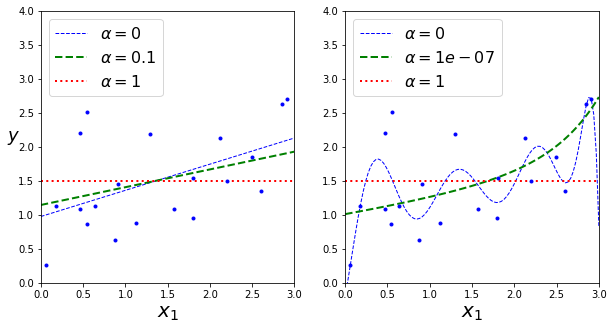

In [37]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,5))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.6]])

array([1.56404896])

## ElasticNet

In [39]:
from sklearn.linear_model import ElasticNet
elasticnet_reg = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elasticnet_reg.fit(X,y)
elasticnet_reg.predict([[1.6]])

array([1.57379494])